Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [212]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

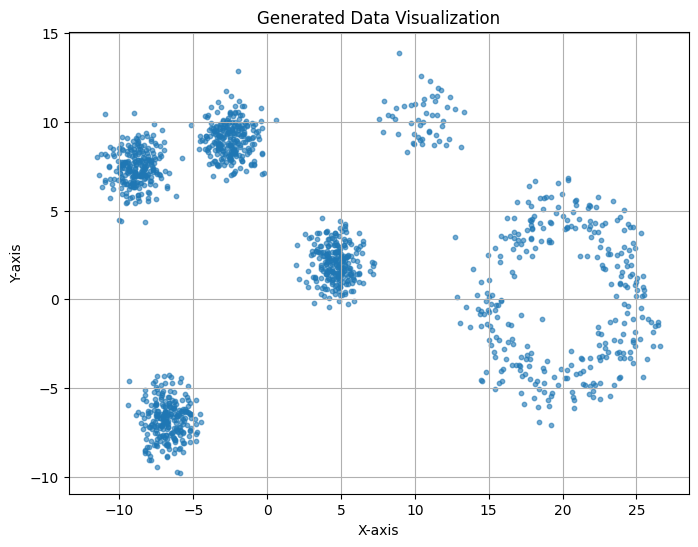

In [213]:
X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.6)
plt.title("Generated Data Visualization")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [214]:
# create data
X = create_data(1.0, 1000, 50, 300, 200)

# calculate the clusters silhouette_scores
silhouette_scores = []
k_values = range(2, 11)  # number of clusters
best_kmeans_score = -1
best_kmeans_k = None

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    if score > best_kmeans_score:
        best_kmeans_score = score
        best_kmeans_k = k
#optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]

kmeans = KMeans(n_clusters=optimal_k,random_state=42)
kmeans.fit(X)
optimal_score = silhouette_score(X, kmeans.labels_)

# final result
print(f"Optimal K={optimal_k}, Silhouette Score: {optimal_score:}")



Optimal K=8, Silhouette Score: 0.716259254869025


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [215]:
cluster_range = range(2, 11)
silhouette_scores = []
best_agg_score = -1
best_agg_k = None

for n_clusters in cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    if score > best_agg_score:
        best_agg_score = score
        best_agg_k = n_clusters

optimal_clusters = cluster_range[np.argmax(silhouette_scores)]

agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_labels = agg_clustering.fit_predict(X)
optimal_score = silhouette_score(X, agg_labels)

print(f"Optimal K={optimal_clusters}, Silhouette Score: {optimal_score:}")



Optimal K=6, Silhouette Score: 0.7256900714288006


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [216]:
eps_optimal = 1.5

dbscan = DBSCAN(eps=eps_optimal, min_samples=10,algorithm='kd_tree')
dbscan_labels = dbscan.fit_predict(X)

if len(set(dbscan_labels)) > 1:
    best_dbscan_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN - eps={eps_optimal}, Silhouette Score: {score:}")
else:
    best_dbscan_score = -1

DBSCAN - eps=1.5, Silhouette Score: 0.7088165601086022


6. Compare the results and choose the best method for the data


In [217]:

# Choose the best method
best_method = max(
    ('KMeans', best_kmeans_score),
    ('Agglomerative', best_agg_score),
    ('DBSCAN', best_dbscan_score),
    key=lambda x: x[1]
)

print(f"\nBest method based on Silhouette Score: {best_method[0]} with score {best_method[1]:}")


Best method based on Silhouette Score: Agglomerative with score 0.7256900714288006
